# Implementing an Artificial Neural Network with Mathematical Formulas Only (No Frameworks)


## Python Version

In [411]:
from platform import python_version
print('Python version of Jupyter Notebook:', python_version())

# To update the package, execute the code below in the terminal or comand prompt:
# pip install -U nome_pacote

# To install the exact version of a package, execute the code below on terminal or comand prompt:
# pip install pack_name==desired_version

# After it, reboot jupyter notebook.

Python version of Jupyter Notebook: 3.8.10


## Import the libraries

In [412]:
# For now only NumPy
import numpy as np

## 1st Step - Coding the Functions

### [1A - Forward Propagation](https://arxiv.org/pdf/1905.07490.pdf)

### Function to Initialize Weights 

In [413]:
# Function for random initialization of model parameters
def initial_param(dims_input_layer):
    
    # Dictionary for parameters
    parameters = {}
    
    # Length of layer dimensions
    leng = len(dims_input_layer)
    
    # Length Loop
    for i in range(1, leng):
        
        # Initialization of the weight matrix
        parameters["W" + str(i)] = np.random.randn(dims_input_layer[i], dims_input_layer[i - 1]) * 0.01
        
        # Bias Initialization
        parameters["b" + str(i)] = np.zeros((dims_input_layer[i], 1))
    
    return parameters

### Developing the Sigmoid Function

In [414]:
# Sigmoide Function
def sigmoid(Z):
    A = 1 / (1 + np.exp(-Z))
    return A, Z

### Developing the ReLU Function

In [415]:
# ReLu Function (Rectified Linear Unit)
def relu(Z):
    A = abs(Z * (Z > 0))
    return A, Z

### Develpping the Linear Activation 

In [416]:
# Activation Operation
# A is the array with the input data
# W is the weight matrix
# b is the bias
def linear_activation(A, W, b):
    Z = np.dot(W, A) + b
    cache = (A, W, b)
    return Z, cache

### Developing the Forward Propagation Process 

In [417]:
# Forward Movement 
def forward(A_prev, W, b, activation):
    
    # If the Sigmoid activation function is chosen
    if activation == "sigmoid":
        Z, linear_cache = linear_activation(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
        
    # If the Relu activation function is chosen    
    elif activation == "relu":
        Z, linear_cache = linear_activation(A_prev, W, b)
        A, activation_cache = relu(Z)
        
    cache = (linear_cache, activation_cache)
    
    return A, cache

### Combining Activation and Propagation

In [418]:
# Foward Propagation
def forward_propagation(X, parameters):
    
    # List of previous values (cache)
    caches = []
    
    # Input Data
    A = X
    
    # Parameter Length
    L = len(parameters) // 2
   
    # Loop
    for i in range(1, L):
      
        # Saves the previous value of A
        A_prev = A
        
        # Forward execution
        A, cache = forward(A_prev, parameters["W" + str(i)], parameters["b" + str(i)], activation = "relu")
        
        # Saves the cache
        caches.append(cache)
    
    # Last layer output
    A_last, cache = forward(A, parameters["W" + str(L)], parameters["b" + str(L)], activation = "sigmoid")
    
    # Saves cache
    caches.append(cache)
    
    return(A_last, caches)

### Developing the Cost Function

In [419]:
# Cost Function (or Error Function)
def calculate_cost(A_last, Y):
    
    # Adjusts the shape of Y to obtain its length (total number of elements)
    m = Y.shape[1]
    
    # Calculate the cost comparing the real and predicted values
    cost = (-1 / m) * np.sum((Y * np.log(A_last)) + ((1 - Y) * np.log(1 - A_last)))
    
    # Adjust cost shape
    custo = np.squeeze(cost)
    
    return(cost)

### 1B - Backward Propagation

### Developing the Backward Propagation - Sigmoid Backward Function

In [420]:
# Backpropagation Sigmoid Function
# Calculate of the derivative because we don't want the complete value of the function, but its variation
def sigmoid_backward(da, Z):
    
    # Calculate the Z derivative
    dg = (1 / (1 + np.exp(-Z))) * (1 - (1 / (1 + np.exp(-Z))))
    
    # Finding the change in z derivative
    dz = da * dg
    return dz

# Compare with the sigmoid function of forward propagation
# A = 1 / (1 + np.exp(-Z))

### Developing the Backward Propagation - Backward Relu Function

In [421]:
# Relu Function for backpropagation
# Calculate the derivative because we don't want the complete value of the function, but its variation
def relu_backward(da, Z):
    
    dg = 1 * ( Z >= 0)
    dz = da * dg
    return dz

### Developing the Backward Propagation - Linear Activation Backward Function

In [422]:
# Linear activation for backpropagation 
def linear_backward_function(dz, cache):
    
    # Receives the cache (memory)
    A_prev, W, b = cache
    
    # M Shape 
    m = A_prev.shape[1]
    
    # Calculate the derivative of W (result of the operation with dz)
    dW = (1 / m) * np.dot(dz, A_prev.T)
    
    # Calculate the derivative of b (result of the operation with dz)
    db = (1 / m) * np.sum(dz, axis = 1, keepdims = True)
    
    # Calculate the operation derivative
    dA_prev = np.dot(W.T, dz)
    
    return dA_prev, dW, db

### Developing the Backward Propagation - Ativação Linear Backward Function

In [423]:
# Function which defines the activation function (Relu or Sigmoid)
def linear_activation_backward(dA, cache, activation):
    
    # Extract cache
    linear_cache, activation_cache = cache
    
    # Verifica se a ativação é relu
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward_function(dZ, linear_cache)
        
    # Check if activation is Sigmoid
    if activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward_function(dZ, linear_cache)
        
    return dA_prev, dW, db

### Combining Activation and backpropagation - Backpropagation Algorithm

In [424]:
# Backpropagation algorithm (calculates the gradients for the update of the weights)
# EV = Forward's Expected Value
# RV = Real Value
def backward_propagation(EV, RV, caches):
    
    # Gradients's Dictionary
    grads = {}
    
    # Datas length (in the cache)
    L = len(caches)
    
    # Extracts the length for the value of m
    m = EV.shape[1]
    
    # Adjust the Y shape
    RV = RV.reshape(EV.shape)
    
    # Calculate the derivative of the final prediction of the network (done at the end of the forward propagation)
    dAL = -((RV / EV) - ((1 - RV) / (1 - EV)))
    
    # Capture the current cache
    current_cache = caches[L - 1]
    
    # Generate a list of gradients for the data, the weights and the bias (final fase of the forward propagation)
    grads["dA" + str(L - 1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, activation = "sigmoid")
    
    #Loop to calculate the derivative during the linear activations with the Relu
    for l in reversed(range(L - 1)):
        
        # Current Cache 
        current_cache = caches[l]
        
        # Derivative calculation
        dA_prev, dW, db = linear_activation_backward(grads["dA" + str(l + 1)], current_cache, activation = "relu")
        
        #Update the gradients dictionary, using the index
        grads["dA" + str(l)] = dA_prev
        grads["dW" + str(l + 1)] = dW
        grads["db" + str(l + 1)] = db
        
    return grads

### Gradient and Weight Update

In [425]:
# Weight Update Function
def weight_update(parameters, grads, learning_rate):
    
    # Length of the structure with the parameters (weights and bias)
    L = len(parameters)//2
    
    # Loop for the weights update
    for l in range(L):
        
        # Weight update
        parameters["W" + str(l + 1)] = parameters["W" + str(l + 1)] - (learning_rate * grads["dW" + str(l + 1)])
        
        # Bias update
        parameters["b" + str(l + 1)] = parameters["b" + str(l + 1)] - (learning_rate * grads["db" + str(l + 1)])
    
    return parameters

### Implementing the Complete Network

In [426]:
# Complete Neural Network Model
def modelNN(X, Y, input_layers_dim, learning_rate = 0.0075, num_iterations = 100):
    
    # List to receive the cost per epoch of training
    costs = []
    
    # Parameters initialization
    parameters = initial_param(input_layers_dim)
    
    # Loop of iterations (epochs)
    for i in range(num_iterations):
        
        # Forward Propagation
        AL, caches = forward_propagation(X, parameters)
        
        # Cost Calculation
        cost = calculate_cost(AL, Y)
        
        # Backward Propagation
        gradient = backward_propagation(AL, Y, caches)
        
        # Weight Update
        parameters = weight_update(parameters, gradient, learning_rate)
        
        # Print of the values of intermetiate cost (cost reduction indicates model learning)
        if i % 10 == 0:
            print("Cost after " + str(i) + " interactions is " + str(cost))
            costs.append(cost)
            
    return parameters, costs

In [427]:
# Predictions Function
def predict(X, parametros):
    AL, caches = forward_propagation(X, parametros)
    return AL

### Step 2 - Training the Artificial Neural Network to Predict Cancer Occurrence

In [428]:
# Imports
import sklearn
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [429]:
# Packages Version
%reload_ext watermark
%watermark -a "João Salero" --iversions

Author: João Salero

matplotlib: 3.3.4
ipykernel : 5.3.4
sklearn   : 0.24.2
sys       : 3.8.10 (default, May 19 2021, 13:12:57) [MSC v.1916 64 bit (AMD64)]
numpy     : 1.19.5
pandas    : 1.3.0



### Loading Data
From: https://scikit-learn.org/stable/datasets/index.html#breast-cancer-dataset

In [430]:
# Loading
temp = load_breast_cancer()

In [431]:
# Object type
type(temp)

sklearn.utils.Bunch

In [432]:
# View the object
temp

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [433]:
# Loading the dataset
dados = pd.DataFrame(columns = load_breast_cancer()["feature_names"], data = load_breast_cancer()["data"])

In [434]:
# Shape
dados.shape

(569, 30)

In [435]:
# Data view
dados.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [436]:
# Missing Values Vefiring
dados.isnull().any()

mean radius                False
mean texture               False
mean perimeter             False
mean area                  False
mean smoothness            False
mean compactness           False
mean concavity             False
mean concave points        False
mean symmetry              False
mean fractal dimension     False
radius error               False
texture error              False
perimeter error            False
area error                 False
smoothness error           False
compactness error          False
concavity error            False
concave points error       False
symmetry error             False
fractal dimension error    False
worst radius               False
worst texture              False
worst perimeter            False
worst area                 False
worst smoothness           False
worst compactness          False
worst concavity            False
worst concave points       False
worst symmetry             False
worst fractal dimension    False
dtype: boo

In [437]:
# Target Variable Separation
target = load_breast_cancer()["target"]

In [438]:
type(target)

numpy.ndarray

In [439]:
# Variable Target
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [440]:
# Total records by class - Benign Cancer
np.count_nonzero(target == 1)

357

In [441]:
# Total records by class - Malignant Cancer
np.count_nonzero(target == 0)

212

### Labels Encoder


In [442]:
# Labels dictionary
labels = {}

# Target variable class names
target_names = load_breast_cancer()["target_names"]

# Mapping
for i in range(len(target_names)):
    labels.update({i:target_names[i]})

In [443]:
# Labels view
labels

{0: 'malignant', 1: 'benign'}

In [444]:
# Preparing the predictor variables in X
X = np.array(dados)

In [445]:
# View input data
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [446]:
# Spliting the input and output data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size = 0.15, shuffle = True)

In [447]:
# Trainig data Shape
print(X_train.shape)
print(y_train.shape)

(483, 30)
(483,)


In [448]:
# Test data Shape
print(X_test.shape)
print(y_test.shape)

(86, 30)
(86,)


In [449]:
# Adjust the shape of the input data
X_train = X_train.T
X_test = X_test.T

In [450]:
print(X_train.shape)
print(X_test.shape)

(30, 483)
(30, 86)


In [451]:
# Adjusting the output data
y_train = y_train.reshape(1, len(y_train))
y_test = y_test.reshape(1, len(y_test))

In [452]:
print(y_train.shape)
print(y_test.shape)

(1, 483)
(1, 86)


In [453]:
# Variables with the input dimensions for the number of neurons
input_layers_dim = [X_train.shape[0], 50, 20, 5, 1]            

In [454]:
input_layers_dim

[30, 50, 20, 5, 1]

In [455]:
# Model Training

print("\nStarting Training.\n")

parameters, cost = modelNN(X = X_train, 
                             Y = y_train, 
                             input_layers_dim = input_layers_dim, 
                             num_iterations = 3000, 
                             learning_rate = 0.0075)

print("\nTraining Completed.\n")


Starting Training.

Cost after 0 interactions is 0.6931276893461216
Cost after 10 interactions is 0.692004602428229
Cost after 20 interactions is 0.690922907585933
Cost after 30 interactions is 0.6898806951805921
Cost after 40 interactions is 0.6888764292353324
Cost after 50 interactions is 0.6879086539107697
Cost after 60 interactions is 0.6869759610356361
Cost after 70 interactions is 0.6860769411214418
Cost after 80 interactions is 0.6852102245827972
Cost after 90 interactions is 0.6843748875353061
Cost after 100 interactions is 0.6835696079577729
Cost after 110 interactions is 0.6827931027961235
Cost after 120 interactions is 0.682044204314441
Cost after 130 interactions is 0.6813217926219041
Cost after 140 interactions is 0.6806247710463252
Cost after 150 interactions is 0.6799520828395305
Cost after 160 interactions is 0.6793026844259258
Cost after 170 interactions is 0.6786755387039409
Cost after 180 interactions is 0.6780696305841306
Cost after 190 interactions is 0.6774839554

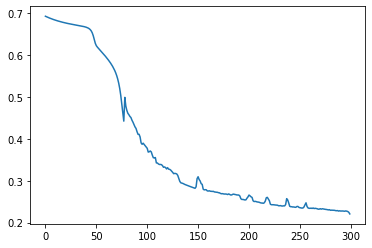

In [456]:
# Error plot during training
plt.plot(cost)

In [457]:
# Predictions with training data
y_pred_train = predict(X_train, parameters)

In [458]:
# Predictions view
y_pred_train

array([[8.85406289e-01, 8.81108619e-01, 1.09085261e-08, 2.45285687e-02,
        8.85408502e-01, 7.54637247e-12, 8.85405295e-01, 8.85409514e-01,
        8.85408511e-01, 2.65011422e-04, 8.85407396e-01, 8.85408076e-01,
        8.77427009e-01, 8.85409032e-01, 6.68853024e-01, 8.85408216e-01,
        2.37167795e-02, 2.73546142e-03, 6.51933601e-01, 1.97043414e-02,
        8.82635260e-01, 8.85407642e-01, 8.75995605e-01, 8.68990745e-01,
        7.94789075e-01, 9.85120594e-12, 8.85407572e-01, 2.01663859e-05,
        8.81446458e-01, 8.31380482e-01, 8.85408371e-01, 8.85409148e-01,
        1.84058354e-02, 1.05943283e-08, 3.90920079e-02, 1.31054104e-01,
        8.77429716e-01, 4.44770308e-03, 8.85407749e-01, 4.87264321e-01,
        8.85407551e-01, 3.32905417e-01, 8.85408315e-01, 7.86796197e-01,
        8.85408779e-01, 1.40603191e-03, 8.85409651e-01, 8.85407689e-01,
        7.10362167e-01, 8.85407661e-01, 8.12865094e-01, 5.73224461e-02,
        8.77553232e-01, 1.96689813e-05, 7.51398542e-01, 4.690499

In [459]:
# Adjusting the shape in training
y_pred_train = y_pred_train.reshape(-1)
y_train = y_train.reshape(-1)

In [460]:
y_pred_train > 0.5

array([ True,  True, False, False,  True, False,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True, False, False,
        True, False,  True,  True,  True,  True,  True, False,  True,
       False,  True,  True,  True,  True, False, False, False, False,
        True, False,  True, False,  True, False,  True,  True,  True,
       False,  True,  True,  True,  True,  True, False,  True, False,
        True, False,  True, False,  True, False,  True, False, False,
        True, False,  True,  True,  True,  True, False, False,  True,
       False,  True,  True, False,  True,  True, False, False,  True,
       False,  True,  True, False, False,  True,  True,  True,  True,
        True, False, False,  True,  True,  True,  True,  True,  True,
       False,  True, False, False, False, False, False, False,  True,
        True,  True, False, False, False,  True,  True,  True, False,
        True,  True,  True, False,  True,  True,  True,  True,  True,
       False,  True,

In [461]:
# Convert predictions to class binary value (0 or 1, using the probability value of 0.5 as threshold)
y_pred_train = 1 * (y_pred_train > 0.5)

In [462]:
y_pred_train

array([1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,

In [463]:
# Calculating accuracy by comparing actual value with predicted value
acc_train = sum(1 * (y_pred_train == y_train)) / len(y_pred_train) * 100

In [464]:
print("Accuracy in training data: " + str(acc_train))

Accuracy in training data: 92.54658385093167


In [465]:
print(classification_report(y_train, y_pred_train, target_names = ['Malignant', 'Benign']))

              precision    recall  f1-score   support

   Malignant       0.92      0.87      0.90       182
      Benign       0.93      0.96      0.94       301

    accuracy                           0.93       483
   macro avg       0.93      0.92      0.92       483
weighted avg       0.93      0.93      0.93       483



In [466]:
# Predictions with the model using test data
y_pred_test = predict(X_test, parameters)

In [467]:
# View Data
y_pred_test

array([[2.84057030e-02, 6.70504474e-01, 7.60501115e-02, 4.28699216e-02,
        8.85409531e-01, 7.34481976e-01, 8.58729658e-01, 2.79864886e-06,
        6.27284530e-02, 8.85408591e-01, 8.85407654e-01, 8.85407926e-01,
        8.85408649e-01, 8.85407365e-01, 8.13763706e-01, 8.85408566e-01,
        8.85405492e-01, 8.80186186e-01, 7.84320493e-11, 1.45916079e-04,
        7.20961568e-01, 8.85407970e-01, 8.77104780e-01, 8.85407954e-01,
        8.60030972e-01, 5.34941042e-01, 8.69049926e-01, 8.85407632e-01,
        1.81405687e-02, 5.02636615e-12, 8.64213345e-01, 1.72789020e-15,
        1.73072442e-02, 8.65555671e-01, 8.85408730e-01, 8.85407994e-01,
        8.00579507e-01, 8.85406684e-01, 7.57471812e-01, 4.82056585e-01,
        7.43360549e-09, 2.79322291e-01, 4.72168667e-06, 4.13312892e-02,
        6.67250657e-01, 8.85407370e-01, 2.10883044e-04, 2.27743055e-07,
        3.58906310e-03, 1.07695750e-03, 7.25082336e-01, 8.85409706e-01,
        8.85407397e-01, 8.85405279e-01, 7.50336552e-01, 8.243197

In [468]:
# Shapes settings
y_pred_test = y_pred_test.reshape(-1)
y_test = y_test.reshape(-1)

In [469]:
# Converting predictions to class binary value (0 or 1, using the probability value of 0.5 as threshold)
y_pred_test = 1 * (y_pred_test > 0.5)

In [470]:
# View predictions    
y_pred_test

array([0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1])

In [471]:
# Calculating the accuracy
accuracy = sum(1 * (y_pred_test == y_test)) / len(y_pred_test) * 100

In [472]:
print("Test data accuracy: " + str(accuracy))

Test data accuracy: 93.02325581395348


In [473]:
print(classification_report(y_test, y_pred_test, target_names = ['Malignant', 'Benign']))

              precision    recall  f1-score   support

   Malignant       0.93      0.87      0.90        30
      Benign       0.93      0.96      0.95        56

    accuracy                           0.93        86
   macro avg       0.93      0.92      0.92        86
weighted avg       0.93      0.93      0.93        86

